#Martín Noblía

##Tp3

<img src="files/copy_left.png" style="float: left;"/>
<div style="clear: both;"> 

##Control de Robots 2013

###Ingeniería en Automatización y Control 
###Universidad Nacional de Quilmes




##Ejercicio 1

#### Determinar el espacio de trabajo alcanzable para el manipulador de 3 brazos de la figura siguiente con $L_1=15.0$ (cm), $L_2=10.0$(cm), $L_3=3.0$(cm), $0º < \theta_{1} < 360º$, $0º < \theta_{2} < 180º$, $0º < \theta_{3} < 180º$ 

In [51]:
from IPython.core.display import Image

In [52]:
Image(filename='Imagenes/copy_left.png')

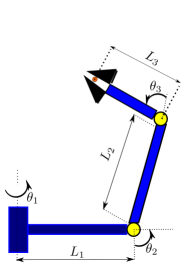

In [53]:
Image(filename='Imagenes/dibujo_robot2_tp2.png')

In [54]:
#imports
from sympy import *

import numpy as np



In [55]:
#Con esto las salidas van a ser en LaTeX
init_printing(use_latex=True)

Recordemos que el espacio de trabajo alcanzable es la región espacial a la que el efector final puede llegar, con al menos una orientación. Vamos a desarrollar primero la cinemática directa(como en el tp2) para luego evaluar variando los angulos de articulaciones en los rangos dados y asi obtener el espacio de trabajo alcanzable.

In [56]:
#Funcion simbólica para una rotación(transformacion homogenea) sobre el eje X
def Rot_X(angle):
    
    rad = angle*pi/180
    M = Matrix([[1,0,0,0],[ 0,cos(rad),-sin(rad),0],[0,sin(rad), cos(rad),0],[0,0,0,1]])
    
    return M

#Funcion simbólica para una rotación(transformacion homogenea) sobre el eje Y
def Rot_Y(angle):
    rad = angle*pi/180
    M = Matrix([[cos(rad),0,sin(rad),0],[ 0,1,0,0],[-sin(rad), 0,cos(rad),0],[0,0,0,1]])
   
    return M

#Funcion simbólica para una rotación(transformacion homogenea) sobre el eje Z
def Rot_Z(angle):
    rad = angle*pi/180
    M = Matrix([[cos(rad),- sin(rad),0,0],[ sin(rad), cos(rad), 0,0],[0,0,1,0],[0,0,0,1]])
    return M


In [57]:
#Funcion simbolica para una traslacion en el eje X
def Traslacion_X(num):
    D = Matrix([[1,0,0,num],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    return D

#Funcion simbolica para una traslacion en el eje Y
def Traslacion_Y(num):
    D = Matrix([[1,0,0,0],[0,1,0,num],[0,0,1,0],[0,0,0,1]])
    return D

#Funcion simbolica para una traslacion en el eje Z
def Traslacion_Z(num):
    D = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,num],[0,0,0,1]])
    return D


In [58]:
#estos son simbolos especiales que los toma como letras griegas directamente(muuy groso)
alpha, beta , gamma, phi, theta, a, d =symbols('alpha beta gamma phi theta a d')

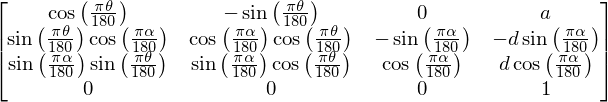

In [59]:
#Generamos la transformacion 
T = Rot_X(alpha) * Traslacion_X(a) * Rot_Z(theta) * Traslacion_Z(d)
T

In [60]:
#Creamos los nuevos simbolos
theta_1, theta_2, theta_3, L_1, L_2, L_3 =symbols('theta_1, theta_2, theta_3, L_1, L_2 L_3')

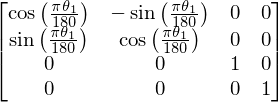

In [61]:
T_0_1  = T.subs([(alpha,0),(a,0),(d,0),(theta,theta_1)])
T_0_1

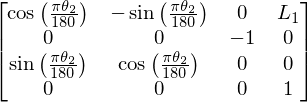

In [62]:
T_1_2 = T.subs([(alpha,90),(a,L_1),(d,0),(theta,theta_2)])
T_1_2

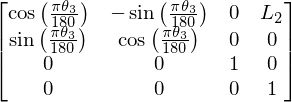

In [63]:
T_2_3 = T.subs([(alpha,0),(a,L_2),(d,0),(theta,theta_3)])
T_2_3

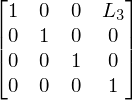

In [64]:
#Agregamos la ultima trama 
T_w = Matrix([[1,0,0,L_3],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
T_w

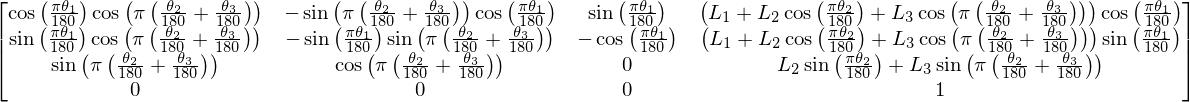

In [65]:
T_B_W = T_0_1 * T_1_2 * T_2_3 * T_w
T_B_W.simplify()
T_B_W

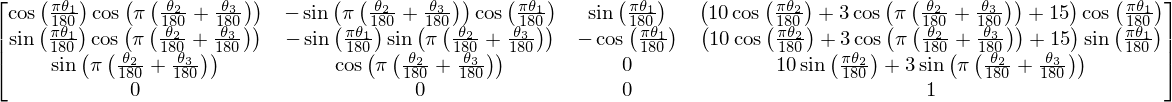

In [66]:
T_real = T_B_W.subs([(L_1,15),(L_2,10),(L_3,3)])
T_real

In [67]:
#generamos una funcion numerica() a partir de la expresion simbolica
func = lambdify((theta_1,theta_2,theta_3),T_real,'numpy')

In [68]:
#verificamos si funciona 
func(10,30,10)

matrix([[  0.75440651,  -0.63302222,   0.17364818,  25.56402113],
        [  0.13302222,  -0.1116189 ,  -0.98480775,   4.50762666],
        [  0.64278761,   0.76604444,   0.        ,   6.92836283],
        [  0.        ,   0.        ,   0.        ,   1.        ]])

In [69]:
def get_position(q_1,q_2,q_3):
    """
    Funcion para extraer la posicion cartesiana de la transformacion
    homogenea que describe la cinematica directa del manipulador RRR 
    espacial(ver ejercicio 2 tp2)
    
    Inputs:
    q_1 (angulo del link 1)
    q_2 (angulo del link 2)
    q_3 (angulo del link 3)
    
    Outputs:
    
    """
    
    M = func(q_1,q_2,q_3)
    
    arr = np.asarray(M)
    x = arr[0,3]
    y = arr[1,3]
    z = arr[2,3]
    return x,y,z

In [70]:
#probamos si funciona
L=get_position(10,10,10)
L

In [71]:
%pylab inline
plt.rcParams['figure.figsize'] = 12,10
import mpl_toolkits.mplot3d.axes3d as axes3d


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


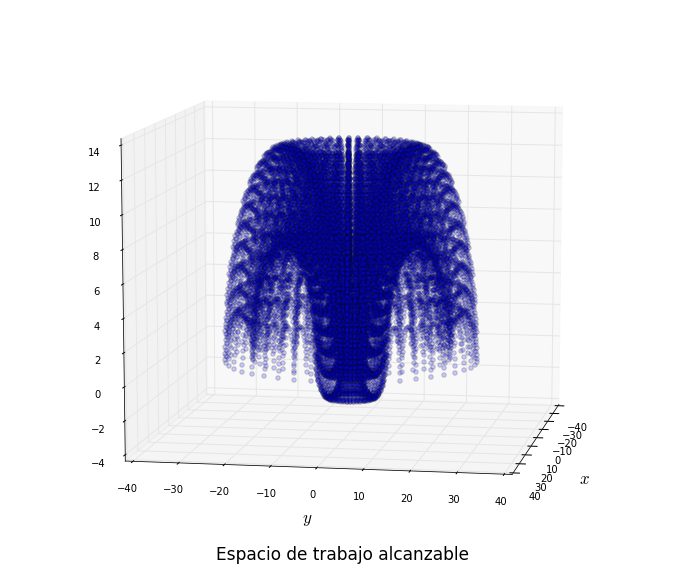

In [72]:
#TODO vectorizar 
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#generamos los rangos de los angulos y evaluamos su posicion cartesiana
for i in xrange(0,360,8):
    for j in xrange(0,180,8):
        for k in xrange(0,180,8):
            
            x,y,z = get_position(i,j,k)
            ax.scatter(x,y,z,alpha=.2)
            ax.view_init(elev=10., azim=10.)
            plt.title('Espacio de trabajo alcanzable',fontsize=17)
            
            plt.xlabel(r'$x$',fontsize=17)
            plt.ylabel(r'$y$',fontsize=17)
                
            #ax.set_aspect('equal')
            
plt.show()            

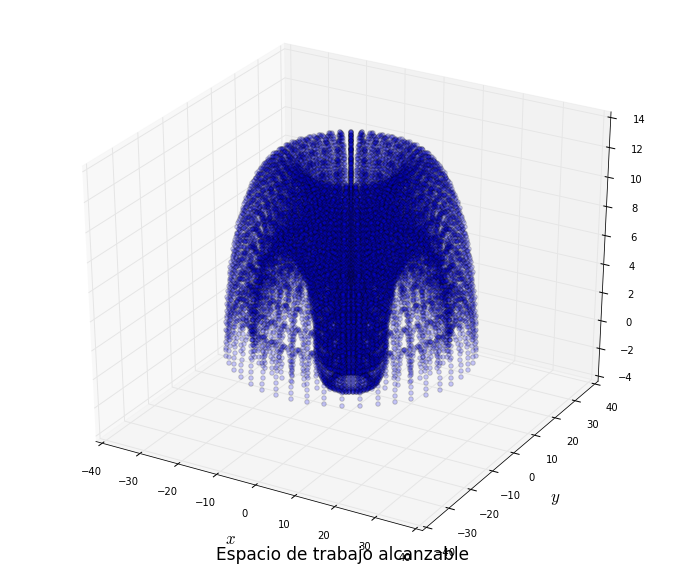

In [73]:
#TODO vectorizar 
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#generamos los rangos de los angulos y evaluamos su posicion cartesiana
for i in xrange(0,360,8):
    for j in xrange(0,180,8):
        for k in xrange(0,180,8):
            
            x,y,z = get_position(i,j,k)
            ax.scatter(x,y,z,alpha=.2)
            #ax.view_init(elev=10., azim=10.)
            plt.title('Espacio de trabajo alcanzable',fontsize=17)
            
            plt.xlabel(r'$x$',fontsize=17)
            plt.ylabel(r'$y$',fontsize=17)
                
            #ax.set_aspect('equal')
            
plt.show()            

##Ejercicio 2

####En el manipulador 2R de la figura siguiente, $L_{1}=2L_{2}$ y los rangos límites para las juntas son:  $0º < \theta_{1} < 180º$, $-90º < \theta_{2} < 180º$. Determinar el espacio de trabajo alcanzable.

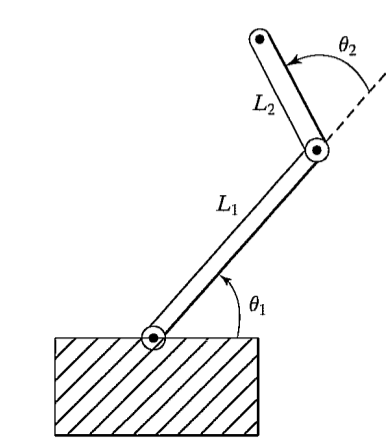

In [74]:
Image(filename='Imagenes/robot2_tp3.png')

Sabemos que los puntos $(x,y)$ de la trama {3} los podemos obtener facilmente en función de los ángulos $\theta_{1}$ y $\theta_{2}$. Vamos a implementar la parametrización en la siguiente función:

In [75]:
def brazo_RR(theta_1, theta_2, L_1, L_2):
    """
    Posicion cartesiana del efector final de un brazo RR
    
    Inputs: 
    theta_1(angulo del link 1)
    theta_2(angulo del link 2)
    L_1(Longitud del link 1)
    L_2(longitud del link 2)
    Outputs: 
    x(posicion cartesiana x del efector final)        
    y(posicion cartesiana y del efector final)
    """
    
    x = L_1 * np.cos(theta_1) + L_2 * np.cos(theta_1 + theta_2)
    y = L_1 * np.sin(theta_1) + L_2 * np.sin(theta_1 + theta_2)
    
    return x, y

In [76]:
theta_1_vec = np.linspace(0,np.pi,100) #vector de 100 muestras en el intervalo[0,pi]
theta_2_vec = np.linspace(-np.pi/2,np.pi,100) #vector de 100 muestras en el intervalo[-pi/2,pi]
#evaluamos a la funcion con varias combinaciones de vectores
x,y = brazo_RR(theta_1_vec,theta_2_vec,2,1)
x1,y1 = brazo_RR(0,theta_2_vec,2,1)
x2,y2 = brazo_RR(theta_1_vec,0,2,1)
#evaluamos con puntos aleatorios del rango
x3,y3 = brazo_RR(np.random.choice(theta_1_vec,2000),np.random.choice(theta_2_vec,2000),2,1)



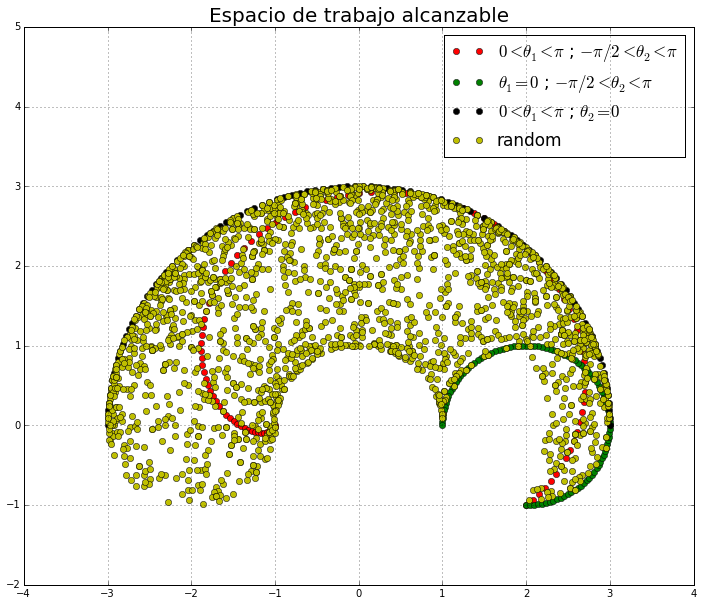

In [77]:
plt.plot(x,y , 'ro')
plt.plot(x1,y1 , 'go')
plt.plot(x2,y2, 'ko')
plt.plot(x3,y3,'yo')
plt.title('Espacio de trabajo alcanzable',fontsize=20)
plt.axis([-4,4,-2,5])
plt.legend([r'$0 < \theta_{1} < \pi$ ; $ -\pi/2 < \theta_{2} < \pi$ ',r'$\theta_{1}=0$ ; $ -\pi/2 < \theta_{2} < \pi$ ',r'$0 < \theta_{1} < \pi$ ; $\theta_{2}=0$','random'],fontsize=17)
plt.grid()
plt.show()

##Ejercicio 3
####Utilizando la substitución geométrica ‘tangente del semiángulo’, convertir la ecuación trascendental: $acos(\theta)+bsin(\theta)=c$, esto es hallar $\theta$ en función de $a$, $b$ y $c$

La sustitución por la tangente de semiangulo es la siguiente:

$u=tg(\frac{\theta}{2})$

$cos(\theta)=\frac{1-u^{2}}{1+u^{2}}$

$sin(\theta)=\frac{2u}{1+u^2}$



para nuetro caso sustituimos en la ecuación trascendental $acos(\theta)+bsin(\theta)=c$ las expresiones de $cos(\theta)$ y $sin(\theta)$

$a(\frac{1-u^{2}}{1+u^{2}})+b(\frac{2u}{1+u^2})=c$ entonces

$a(1-u^{2})+b(2u)=c(1+u^{2})$, luego expresamos la ecuación como un polinomio en $u$

$u^{2}(a+c)-2bu+c-a=0$ el siguiente paso es resolver la cuadrática:

$u= \frac{b \pm \sqrt{b^{2}+a^{2}-c^{2}}}{a+c}$

Por lo tanto:

$\theta=2tg^{-1}(\frac{b \pm \sqrt{b^{2}+a^{2}-c^{2}}}{a+c})$

##Ejercicio 4

####Derive la cinemática inversa del robot RRR del ejercicio 2 de la práctica 2.

Si la transformación $^{S}_{W}T$ esta dada entonces hacemos: $^{B}_{W}T = (^{B}_{S}T)(^{S}_{T}T)(^{W}_{T}T^{-1})$

y como $^{B}_{W}T = (^{0}_{3}T)$, podemos escribir:

$$^{0}_{3}T = \begin{bmatrix}
            r_{11} & r_{12} & r_{13} & x \\\\
            r_{21} & r_{22} & r_{23}  & y \\\\
            r_{31} & r_{32} & r_{33} & z \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$
      
Además como sabemos del ejercicio 2 de la practica 2:

$$^{0}_{3}T = \begin{bmatrix}
            c_{1}c_{23} & -c_{1}c_{23} & s_{1} & c_{1}(c_{2}L_{2}+L_{1}) \\\\
            s_{1}c_{23} & -s_{1}s_{23} & -c_{1}  & s_{1}(c_{2}L_{2}+L_{1}) \\\\
            s_{23} & c_{23} & 0 & s_{2}L_{2} \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$

luego igualamos las componentes $(1,3)$ de ambas matrices, entonces:

$s_{1}=r_{13}$

luego igualamos los elementos $(2,3)$, entonces:

$-c_{1}=r_{23}$, como vemos podemos estimar el valor de $\theta_{1}$ como:

$\theta_{1}=Atan2(r_{13},-r_{23})$

Continuamos igualando los elementos $(1,4)$ y $(2,4)$:

$x=c_{1}(c_{2}L_{2}+L_{1})$

$y=s_{1}(c_{2}L_{2}+L_{1})$

Entonces vemos que si $c_{1} \neq 0$ $\therefore$ $c_{2}=\frac{1}{L_{2}}(\frac{x}{c_{1}}-L_{1})$

o $c_{2}=\frac{1}{L_{2}}(\frac{y}{s_{1}}-L_{1})$

Luego igualando los elementos $(3,4)$ $z=s_{2}L_{2}$ $\therefore$ $\theta_{2}=Atan2(\frac{z}{L_{2}};c_{2})$

Por último igualando los elementos $(3,1)$ y $(3,2)$ 

$s_{23}=r_{31}$

$c_{23}=r_{32}$

Por lo tanto:

$\theta_{3}=Atan2(r_{31};r_{32})-\theta_{2}$





##Ejercicio 5

Este ejercicio se enfoca en la solución de la cinemática de planteamiento inverso para el robot planar 3-DOF(tres grados de libertad)(ver ejercicio 1 ). Se proporcionan los siguientes parámetros de longitud fija: $L_1=4$, $L_2=3$, $L_3=2$

a) Derive en forma analítica y a mano, la solución de planteamiento inverso para este robot. Dado $(^{0}_{H}T)$, calcule todas las múltiples soluciones posibles para $[ \theta_{1},\theta_{2},\theta_{3} ]$ 

b) Desarrolle un programa para resolver por completo este problema de cinemática de planteamiento inverso para el robot $3R$ planar (es decir, proporcione todas las múltiples soluciones). Pruebe su programa utilizando los siguientes casos de entrada:


i) $$^{0}_{H}T = \begin{bmatrix}
            1 & 0 & 0 & 9 \\\\
            0 & 1 & 0  & 0 \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$
ii) $$^{0}_{H}T = \begin{bmatrix}
            0.5 & -0.866 & 0 & 7.5373 \\\\
            0.866 & 0.6 & 0  & 3.9266 \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$
      
iii)$$^{0}_{H}T = \begin{bmatrix}
            0 & 1 & 0 & -3 \\\\
            -1 & 0 & 0  & 2 \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$      

iv)$$^{0}_{H}T = \begin{bmatrix}
            0.866 & 0.5 & 0 & -3.1245 \\\\
            -0.5 & 0.866 & 0  & 9.1674 \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$

Para todos los casos emplee una comprobación circular para validar sus resultados: introduzca cada conjunto de ángulos de articulación(para cada una de las múltiples soluciones ) de vuelta en el programa de planteamiento directo para demostrar que obtiene las matrices $^{0}_{H}T$

####a)
Como sabemos las ecuaciones cinemáticas de este brazo son :

$$(^{B}_{W}T) = (^{0}_{3}T) = \begin{bmatrix}
            c_{123} & -s_{123} & 0 & L_{1}c_{1}+L_{2}c_{12} \\\\
            s_{123} & c_{123} & 0  & L_{1}s_{1}+L_{2}s_{12} \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$
      
Vamos a suponer una configuración genérica del brazo relativa a la trama base, la cual es $(^{B}_{W}T)$. Como estamos trabajando con un manipulador planar, puede lograrse especificando tres números $[x,y,\phi]$, en donde $\phi$ es la orientación del vínculo 3 en el plano(relativo al eje $\hat{X}$). Por ello nuestra transformación genérica es:

$$(^{B}_{W}T)  = \begin{bmatrix}
            c_{\phi} & -s_{\phi} & 0 & x \\\\
            s_{\phi} & c_{\phi} & 0  & y \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$

Todos los destinos alcanzables deben encontrarse en el subespacio implicado por la estructura de la ecuación anterior. Si igualamos las dos matrices llegamos a las siguientes ecuaciones:

$c_{\phi}=c_{123}$

$s_{\phi}=s_{123}$

$x = L_{1}c_{1}+L_{2}c_{12}$

$y = L_{1}s_{1}+ L_{2}s_{12}$

Asi si elevamos al cuadrado las últimas dos ecuaciones y las sumamos:

$x^{2}+y^{2}=L_{1}^{2}+L_{2}^{2}+2L_{1}L_{2}c_{2}$

despejando $c_{2}$

$c_{2}=\frac{x^{2}+y^{2}-L_{1}^{2}-L_{2}^{2}}{2L_{1}L_{2}}$

Entonces, vemos que para que pueda existir una solución el lado derecho de la ecuación anterior debe estar en el intervalo $[-1,1]$ 

Luego suponiendo que se cumple esa condición, podemos hallar el valor del $s_{2}$ como:

$s_{2}=\pm \sqrt{1-c_{2}^{2}}$

Por último calculamos $\theta_{2}$ con la rutina de arco tangente de dos argumentos:

$\theta_{2}=Atan2(s_{2},c_{2})$

Dependiendo que signo hallamos elegido en la ecuación del $s_{2}$ corresponderá a una de las dos suluciones múltiples "codo hacia arriba" o "codo hacia abajo"

Luego podemos resolver para $\theta_{1}$ de la siguiente manera:

sean :

$x=k_{1}c_{1}-k_{2}s_{1}$

$y=k_{1}s_{1}+k_{2}c_{1}$

en donde:

$k_{1}=L_{1}+L_{2}c_{2}$

$k_{2}=L_{2}s_{2}$

si llamamos $r=\pm \sqrt{k_{1}^{2}+k_{2}^{2}}$ y a $\gamma = Atan2(k_{2},k_{1})$ entonces podemos escribir:

$\frac{x}{r}=cos(\gamma)cos(\theta_{1})-sin(\gamma)sin(\theta_{1})$

$\frac{y}{r}=cos(\gamma)sin(\theta_{1})+sin(\gamma)cos(\theta_{1})$

por lo tanto:

$cos(\gamma+\theta_{1})=\frac{x}{r}$

$sin(\gamma+\theta_{1})=\frac{y}{r}$

Usando el arreglo de dos elementos:

$\gamma + \theta_{1}= Atan2(\frac{y}{r},\frac{x}{r})=Atan2(k_{2},k_{1})$

y por lo tanto :

$\theta_{1}= Atan2(y,x)-Atan2(k_{2},k_{1})$

Finalmente podemos resolver para la suma de $\theta_{1}$ a $\theta_{3}$

$\theta_{1}+\theta_{2}+\theta_{3}=Atan2(s_{\phi},c_{\phi})=\phi$

De este último resultado podemos despejar $\theta_{3}$ ya que conocemos el valor de los otros ángulos.

####b)
A continuación desarrolamos una implementación que resuelve la cinemática inversa anterior

In [78]:
def inverse_kin(T, L_1, L_2):
    """
    Funcion para resolver la cinematica inversa de un manipulador planar RRR
    Inputs:
    T(Matriz de tranformacion homogenea)
    L_1(Longitud del link 1)
    L_2(Longitud del link 2)
    
    Outputs: Una tupla de 6 elementos con los angulos de las dos configuraciones
    codo arriba o codo abajo
    (theta_1,theta_2,theta_3,theta_1_up,theta_2_up,theta_3_up)
    
    """
    
    x = T[0,3]
    y = T[1,3]
    
    #calculamos si el punto es alcanzable
    es_alc = (x**2 + y**2 - L_1**2 - L_2**2)/(2*L_1*L_2)
    
    if (-1 <= es_alc <= 1):
        print 'es alcanzable'
        c_2 = es_alc
    #Hay dos soluciones para elegir
        s_2_elbow_up = np.sqrt(1-c_2**2)
    
        s_2_elbow_down = -np.sqrt(1-c_2**2)
    
        theta_2_up = np.arctan2(s_2_elbow_up,c_2)
        theta_2_down = np.arctan2(s_2_elbow_down,c_2)
        
        #cambio de variables
        k_1 = L_1 + L_2*c_2
        k_2_up = L_2*s_2_elbow_up
        k_2_down = L_2*s_2_elbow_down
        gamma_up = np.arctan2(k_2_up,k_1)
        gamma_down = np.arctan2(k_2_down,k_1)
        
        r_up = np.sqrt(k_1**2+k_2_up**2)
        r_down= np.sqrt(k_1**2+k_2_down**2)
        k_1_1 = r_up*np.cos(gamma_up)
        k_1_2 = r_down*np.cos(gamma_down)
        
        k_2_1 = r_up*np.sin(gamma_up)
        k_2_2 = r_down*np.sin(gamma_down)
        
        theta_1_up = np.arctan2(y,x) - np.arctan2(k_2_1,k_1_1)
        theta_1_down = np.arctan2(y,x) - np.arctan2(k_2_2,k_1_2)
        
        c_phi = T[0,0]
        s_phi = T[1,0]
        
        phi = np.arctan2(s_phi,c_phi)
        
        theta_3_up = phi - theta_1_up - theta_2_up
        theta_3_down = phi - theta_1_down - theta_2_down
        
        fac = 180/np.pi #para pasar a grados
        
        return theta_1_up*fac,theta_2_up*fac,theta_3_up*fac,theta_1_down*fac,theta_2_down*fac,theta_3_down*fac    
    else:
            
        print 'No es alcanzable'
        
    
    
    

Vamos a crear las matrices del enunciado para poder evaluarlas, además tenemos que tener en cuenta que las transformaciones que nos dan en el enunciado son las que van de la trama base a la Herramienta, por ello debemos transformarla para que nos quede $^{0}_{3}T = (^{0}_{H}T)(^{H}_{3}T)^{-1}$

Donde :

$$^{H}_{3}T = \begin{bmatrix}
            1 & 0 & 0 & 2 \\\\
            0 & 1 & 0  & 0 \\\\
            0 & 0 & 1 & 0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$



In [79]:
#Matriz de transformacion del insiso i
T_0_H_i = np.array([[1,0,0,9],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
T_0_H_i

array([[1, 0, 0, 9],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [80]:
#Matriz de la transformacion de la trama 3 a la herramienta
T_H_3 = np.array([[1,0,0,2],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
T_H_3

array([[1, 0, 0, 2],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [81]:
#Inversa de la matriz que representa la transformacion de la trama 3 a la herramienta
T_3_H=np.linalg.inv(T_H_3)
T_3_H

array([[ 1.,  0.,  0., -2.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [82]:
#Obtenemos la transformacion que necesitamos
T_0_3_i=np.dot(T_0_H_i,T_3_H)

T_0_3_i

array([[ 1.,  0.,  0.,  7.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [83]:
#calculamos los angulos(deberia dar cero(ya que en x tenemos la suma de los L_1, L_2))
angulos_i = inverse_kin(T_0_3_i,4,3)
angulos_i

es alcanzable


In [84]:
#punto ii)
#Cargamos la matriz y repetimos el procedimiento anterior

T_0_H_ii = np.array([[.5,-0.866,0,7.5373],[0.866,0.6,0,3.9266],[0,0,1,0],[0,0,0,1]])
T_0_H_ii

array([[ 0.5   , -0.866 ,  0.    ,  7.5373],
       [ 0.866 ,  0.6   ,  0.    ,  3.9266],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [85]:
T_0_3_ii = np.dot(T_0_H_ii,T_3_H)
T_0_3_ii

array([[ 0.5   , -0.866 ,  0.    ,  6.5373],
       [ 0.866 ,  0.6   ,  0.    ,  2.1946],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [86]:
#Calculamos los angulos (son 6 tres para una configuracion y tres para la otra)
angulos_ii = inverse_kin(T_0_3_ii,4,3)
angulos_ii

es alcanzable


In [87]:
#punto iii)
#Cargamos la matriz y repetimos el procedimiento anterior
T_0_H_iii = np.array([[0,1,0,-3],[-1,0,0,2],[0,0,1,0],[0,0,0,1]])
T_0_H_iii

array([[ 0,  1,  0, -3],
       [-1,  0,  0,  2],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

In [88]:
T_0_3_iii = np.dot(T_0_H_iii,T_3_H)
T_0_3_iii

array([[ 0.,  1.,  0., -3.],
       [-1.,  0.,  0.,  4.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [89]:
#Calculamos los angulos (son 6 tres para una configuracion y tres para la otra)
angulos_iii = inverse_kin(T_0_3_iii,4,3)
angulos_iii

es alcanzable


In [90]:
#punto iv)
#Cargamos la matriz y repetimos el procedimiento anterior
T_0_H_iv = np.array([[0.866,.5,0,-3.1245],[-.5,0.866,0,9.1674],[0,0,1,0],[0,0,0,1]])
T_0_H_iv

array([[ 0.866 ,  0.5   ,  0.    , -3.1245],
       [-0.5   ,  0.866 ,  0.    ,  9.1674],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [91]:
T_0_3_iv = np.dot(T_0_H_iv,T_3_H)
T_0_3_iv

array([[  0.866 ,   0.5   ,   0.    ,  -4.8565],
       [ -0.5   ,   0.866 ,   0.    ,  10.1674],
       [  0.    ,   0.    ,   1.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

In [92]:
angulos_iv = inverse_kin(T_0_3_iv,4,3)
angulos_iv

No es alcanzable


Ahora vamos a realizar una funcion para verificar circularmente los resultados.
Primero generamos la cinemática directa como en el tp2 simbólicamente y luego la convertimos a numérica gracias a las bondades del lenguaje. 

In [93]:
#Generamos la cinematica directa del brazo planar RRR
T_0_1 = T.subs([(alpha,0),(a,0),(d,0),(theta,theta_1)])
T_1_2 = T.subs([(alpha,0),(a,L_1),(d,0),(theta,theta_2)])
T_2_3 = T.subs([(alpha,0),(a,L_2),(d,0),(theta,theta_3)])
T_0_3 = T_0_1 * T_1_2 * T_2_3
#Reemplazamos los valores de longitudes de link
T_0_3_real = T_0_3.subs([(L_1,4),(L_2,3)])

In [94]:
#generamos una funcion numerica a partir de la simbolica
func_kin = lambdify((theta_1,theta_2,theta_3),T_0_3_real,'numpy')

In [95]:
#evaluamos para los primeros tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_i[0],angulos_i[1],angulos_i[2])

matrix([[ 1., -0.,  0.,  7.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

In [96]:
#evaluamos para los ultimos tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_i[3],angulos_i[4],angulos_i[5])

matrix([[ 1.,  0.,  0.,  7.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

In [97]:
#evaluamos para los primeros tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_ii[0],angulos_ii[1],angulos_ii[2])

matrix([[ 0.500011  , -0.86601905,  0.        ,  6.5373    ],
        [ 0.86601905,  0.500011  ,  0.        ,  2.1946    ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [98]:
#evaluamos para los ultimos tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_ii[3],angulos_ii[4],angulos_ii[5])

matrix([[ 0.500011  , -0.86601905,  0.        ,  6.5373    ],
        [ 0.86601905,  0.500011  ,  0.        ,  2.1946    ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [99]:
#evaluamos para los primeros tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_iii[0],angulos_iii[1],angulos_iii[2])

matrix([[  6.12323400e-17,   1.00000000e+00,   0.00000000e+00,
          -3.00000000e+00],
        [ -1.00000000e+00,   6.12323400e-17,   0.00000000e+00,
           4.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]])

In [100]:
#evaluamos para los ultimos tres elementos de la tupla que contiene los angulos de una configuracion
func_kin(angulos_iii[3],angulos_iii[4],angulos_iii[5])

matrix([[  5.55111512e-17,   1.00000000e+00,   0.00000000e+00,
          -3.00000000e+00],
        [ -1.00000000e+00,   5.55111512e-17,   0.00000000e+00,
           4.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]])

####Vemos que vuelven a dar las mismas matrices de transformación